In [1]:
#imporing essentials

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# For downloading Updated Dataset

import yfinance as yf
from dateutil.relativedelta import relativedelta

#Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
os.remove("file.csv")

In [3]:
currentTimeDate = dt.datetime.now() - relativedelta(years=5)
currentTime = currentTimeDate.strftime(format='%Y-%m-%d')
nct = str(currentTime)
db = yf.download("BTC-USD", start = nct , end = dt.datetime.now() )
db.to_csv("file.csv")

[*********************100%***********************]  1 of 1 completed


In [4]:
maindf=pd.read_csv('file.csv')

In [5]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = maindf[numerical_cols].values

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA()
pca.fit(X_scaled)

# get the principal components
components = pca.components_

# get the explained variance ratio
variance_ratio = pca.explained_variance_ratio_

# print the results
print('Principal components:')
print(components)
print('\nExplained variance ratio:')
print(variance_ratio)

Principal components:
[[ 4.31052503e-01  4.31575307e-01  4.30399062e-01  4.31108738e-01
   4.31108738e-01  2.66427575e-01]
 [-1.15436659e-01 -1.05082783e-01 -1.36861342e-01 -1.19126941e-01
  -1.19126941e-01  9.63596650e-01]
 [ 7.32881331e-01  1.93568078e-01 -9.40502413e-04 -4.61187502e-01
  -4.61187502e-01 -5.25778773e-03]
 [ 2.34062685e-02  5.40965264e-01 -8.19096391e-01  1.33082245e-01
   1.33082245e-01 -2.16347707e-02]
 [-5.13035299e-01  6.87450613e-01  3.53703035e-01 -2.63721883e-01
  -2.63721883e-01 -1.46155276e-03]
 [-4.60805975e-16  5.95023687e-16  5.36418667e-16 -7.07106781e-01
   7.07106781e-01  5.88209790e-18]]

Explained variance ratio:
[8.87723947e-01 1.11632325e-01 4.17143714e-04 1.87556583e-04
 3.90284255e-05 6.03861752e-35]


In [6]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1827
Total number of fields present in the dataset:  7


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [8]:
maindf.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,21032.625512,21538.299043,20477.204986,21041.671640,21041.671640,2.742975e+10
std,16834.689578,17278.339057,16316.798213,16827.652775,16827.652775,1.948600e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7850.785645,8058.414062,7646.816162,7880.458984,7880.458984,1.519029e+10
50%,11895.658203,12144.623047,11662.256836,11916.334961,11916.334961,2.529378e+10
75%,33767.375000,34778.076172,32265.797852,33734.515625,33734.515625,3.613765e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [11]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [12]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2018-04-09
Ending Date 2023-04-09


In [13]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-17')
                     & (maindf['Date'] < '2018-12-31')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-04-09,7044.319824,7178.109863,6661.990234,6770.729980
1,2018-04-10,6795.439941,6872.410156,6704.149902,6834.759766
2,2018-04-11,6843.470215,6968.319824,6817.589844,6968.319824
3,2018-04-12,6955.379883,7899.229980,6806.509766,7889.250000
4,2018-04-13,7901.089844,8183.959961,7758.930176,7895.959961
...,...,...,...,...,...
261,2018-12-26,3819.666748,3893.359619,3769.863770,3857.297607
262,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
263,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
264,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691


In [14]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,8331.220903,8426.705433
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


In [15]:
fig = go.Figure()
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [16]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price',
                  font = dict(color = 'white'))
fig.show()

In [17]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='white',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names))) 
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.show()

The main LSTM Model starts here

In [18]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1827, 2)


In [19]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price for last 5 years', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [20]:
closedf = closedf[closedf['Date'] > '2018-01-09']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1827


In [21]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [22]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1827, 1)


In [23]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1461, 1)
test_data:  (366, 1)


In [24]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1445, 15)
y_train:  (1445,)
X_test:  (350, 15)
y_test (350,)


In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1445, 15, 1)
X_test:  (350, 15, 1)


In [27]:
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [28]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
46/46 [==============================] - 2s 13ms/step - loss: 0.2211 - val_loss: 0.0880
Epoch 2/200
46/46 [==============================] - 0s 6ms/step - loss: 0.1513 - val_loss: 0.0446
Epoch 3/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0941 - val_loss: 0.0096
Epoch 4/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0438 - val_loss: 0.0044
Epoch 5/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0139 - val_loss: 0.0013
Epoch 6/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 7/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0024
Epoch 8/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 9/200
46/46 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 10/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 11

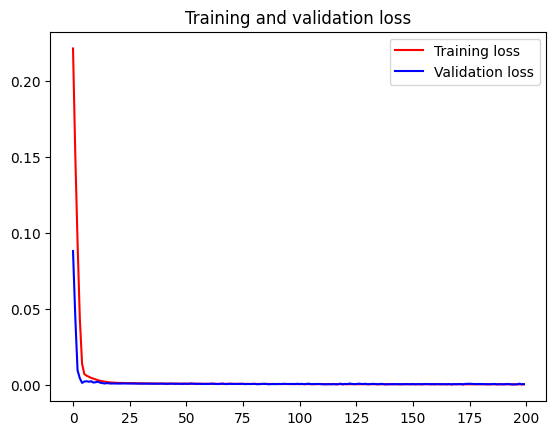

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 2ms/step


((1445, 1), (350, 1))

In [31]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [32]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1247.065339908031
Train data MSE:  1555171.961999933
Train data MAE:  738.6957480671497
-------------------------------------------------------------------------------------
Test data RMSE:  1461.4221809015985
Test data MSE:  2135754.7908311845
Test data MAE:  1161.3886551339285


In [33]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9955199407702761
Test data explained variance regression score: 0.9561814731069284


In [34]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0028010968542997237
Test data MGD:  0.003771942026491762
----------------------------------------------------------------------
Train data MPD:  47.39313723537637
Test data MPD:  87.95613467214301


In [35]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='white', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1827, 1)
Test predicted data:  (1827, 1)


In [36]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 1
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  1


In [37]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16]


In [38]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='white',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [39]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock_price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='black', font_size=15, font_color='white',legend_title_text='Stock')
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig['layout']['yaxis'].update(autorange = True)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()